In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp.now()
df

id          name symbol          slug  num_market_pairs  \
0       1       Bitcoin    BTC       bitcoin             11631   
1    1027      Ethereum    ETH      ethereum              9206   
2     825   Tether USDt   USDT        tether             94063   
3    1839           BNB    BNB           bnb              2207   
4    5426        Solana    SOL        solana               715   
5    3408          USDC   USDC      usd-coin             21485   
6      52           XRP    XRP           xrp              1364   
7   11419       Toncoin    TON       toncoin               502   
8      74      Dogecoin   DOGE      dogecoin              1034   
9    2010       Cardano    ADA       cardano              1221   
10   1958          TRON    TRX          tron              1006   
11   5805     Avalanche   AVAX     avalanche               761   
12   5994     Shiba Inu   SHIB     shiba-inu               854   
13   1831  Bitcoin Cash    BCH  bitcoin-cash               909   
14   6636      Polkadot    DOT  polkadot-new               798   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2020-04-10T00:00:00.000Z   
5   2018-10-08T00:00:00.000Z   
6   2013-08-04T00:00:00.000Z   
7   2021-08-26T13:40:22.000Z   
8   2013-12-15T00:00:00.000Z   
9   2017-10-01T00:00:00.000Z   
10  2017-09-13T00:00:00.000Z   
11  2020-07-13T00:00:00.000Z   
12  2020-08-01T00:00:00.000Z   
13  2017-07-23T00:00:00.000Z   
14  2020-08-19T00:00:00.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [stablecoin, asset-backed-stablecoin, avalanch...           NaN   
3   [marketplace, centralized-exchange, payments, ...           NaN   
4   [pos, platform, solana-ecosystem, cms-holdings...           NaN   
5   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
6   [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
7   [pos, layer-1, ftx-bankruptcy-estate, dwf-labs...           NaN   
8   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
9   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
10  [media, payments, tron-ecosystem, layer-1, dwf...           NaN   
11  [defi, smart-contracts, three-arrows-capital-p...  7.157487e+08   
12      [memes, ethereum-ecosystem, doggone-doggerel]           NaN   
13  [mineable, pow, sha-256, marketplace, medium-o...  2.100000e+07   
14  [substrate, polkadot, binance-chain, polkadot-...           NaN   

    circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0         1.973954e+07  1.973954e+07            False       NaN         1   
1         1.202724e+08  1.202724e+08             True       NaN         2   
2         1.156386e+11  1.170681e+11             True       NaN         3   
3         1.459364e+08  1.459364e+08            False       NaN         4   
4         4.668440e+08  5.822646e+08             True       NaN         5   
5         3.449201e+10  3.449201e+10            False       NaN         6   
6         5.611308e+10  9.998734e+10            False       NaN         7   
7         2.518560e+09  5.110440e+09             True       NaN         8   
8         1.455221e+11  1.455221e+11             True       NaN         9   
9         3.593454e+10  3.713026e+10            False       NaN        10   
10        8.697576e+10  8.697576e+10             True       NaN        11   
11        3.953353e+08  4.446817e+08            False       NaN        12   
12        5.892704e+14  5.895191e+14            False       NaN        13   
13        1.974656e+07  1.974656e+07            False       NaN        14   
14        1.480797e+09  1.480797e+09             True       NaN        15   

    self_reported_circulating_supply  self_reported_market_cap tvl_

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])


    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r"C:\Users\tarun\Downloads\API.csv"):
        df.to_csv(r"C:\Users\tarun\Downloads\API.csv", header='column_names')
    else:
        df.to_csv(r"C:\Users\tarun\Downloads\API.csv", mode='a', header=False)
   

In [6]:
import os
from time import sleep
import pandas as pd

# Define the API runner function
def api_runner():
    global df
    
    # Your API request and data handling code here...
    
    # Example DataFrame processing
    df2 = pd.json_normalize(data['data'])
    
    # Fix deprecation warning by using 'utc=True' in pd.to_datetime
    df2['Timestamp'] = pd.to_datetime('now', utc=True)
    
    # Fix deprecation warning by using pd.concat instead of append
    df = pd.concat([df, df2], ignore_index=True)
    
    # Fix deprecation warning by using 'utc=True' in pd.to_datetime
    df['timestamp'] = pd.to_datetime('now', utc=True)
    
    # Save to CSV or other processing...
    # Your existing CSV saving code...

# Number of times to run the API runner
iterations = 100

# Run the API runner at regular intervals
for i in range(iterations):
    api_runner()
    print(f'API Runner completed iteration {i+1}/{iterations}')
    sleep(60)  # Sleep for 1 minute

print("All iterations completed. Exiting script.")


API Runner completed iteration 1/100
API Runner completed iteration 2/100
API Runner completed iteration 3/100
API Runner completed iteration 4/100
API Runner completed iteration 5/100
API Runner completed iteration 6/100
API Runner completed iteration 7/100
API Runner completed iteration 8/100
API Runner completed iteration 9/100
API Runner completed iteration 10/100
API Runner completed iteration 11/100
API Runner completed iteration 12/100
API Runner completed iteration 13/100
API Runner completed iteration 14/100
API Runner completed iteration 15/100
API Runner completed iteration 16/100
API Runner completed iteration 17/100
API Runner completed iteration 18/100
API Runner completed iteration 19/100
API Runner completed iteration 20/100
API Runner completed iteration 21/100
API Runner completed iteration 22/100
API Runner completed iteration 23/100
API Runner completed iteration 24/100
API Runner completed iteration 25/100
API Runner completed iteration 26/100
API Runner completed 

In [7]:
df72 = pd.read_csv(r"C:\Users\tarun\Downloads\API.csv")
df72

0      1       Bitcoin   BTC       bitcoin  11631  \
0     1   1027      Ethereum   ETH      ethereum   9206   
1     2    825   Tether USDt  USDT        tether  94062   
2     3   1839           BNB   BNB           bnb   2207   
3     4   5426        Solana   SOL        solana    715   
4     5   3408          USDC  USDC      usd-coin  21485   
5     6     52           XRP   XRP           xrp   1364   
6     7  11419       Toncoin   TON       toncoin    502   
7     8     74      Dogecoin  DOGE      dogecoin   1034   
8     9   2010       Cardano   ADA       cardano   1221   
9    10   1958          TRON   TRX          tron   1006   
10   11   5805     Avalanche  AVAX     avalanche    761   
11   12   5994     Shiba Inu  SHIB     shiba-inu    854   
12   13   1831  Bitcoin Cash   BCH  bitcoin-cash    909   
13   14   6636      Polkadot   DOT  polkadot-new    798   
14    0      1       Bitcoin   BTC       bitcoin  11631   
15    1   1027      Ethereum   ETH      ethereum   9206   
16    2    825   Tether USDt  USDT        tether  94062   
17    3   1839           BNB   BNB           bnb   2207   
18    4   5426        Solana   SOL        solana    715   
19    5   3408          USDC  USDC      usd-coin  21485   
20    6     52           XRP   XRP           xrp   1364   
21    7  11419       Toncoin   TON       toncoin    502   
22    8     74      Dogecoin  DOGE      dogecoin   1034   
23    9   2010       Cardano   ADA       cardano   1221   
24   10   1958          TRON   TRX          tron   1006   
25   11   5805     Avalanche  AVAX     avalanche    761   
26   12   5994     Shiba Inu  SHIB     shiba-inu    854   
27   13   1831  Bitcoin Cash   BCH  bitcoin-cash    909   
28   14   6636      Polkadot   DOT  polkadot-new    798   
29    0      1       Bitcoin   BTC       bitcoin  11631   
30    1   1027      Ethereum   ETH      ethereum   9206   
31    2    825   Tether USDt  USDT        tether  94062   
32    3   1839           BNB   BNB           bnb   2207   
33    4   5426        Solana   SOL        solana    715   
34    5   3408          USDC  USDC      usd-coin  21485   
35    6     52           XRP   XRP           xrp   1364   
36    7  11419       Toncoin   TON       toncoin    502   
37    8     74      Dogecoin  DOGE      dogecoin   1034   
38    9   2010       Cardano   ADA       cardano   1221   
39   10   1958          TRON   TRX          tron   1006   
40   11   5805     Avalanche  AVAX     avalanche    761   
41   12   5994     Shiba Inu  SHIB     shiba-inu    854   
42   13   1831  Bitcoin Cash   BCH  bitcoin-cash    909   
43   14   6636      Polkadot   DOT  polkadot-new    798   
44    0      1       Bitcoin   BTC       bitcoin  11631   
45    1   1027      Ethereum   ETH      ethereum   9206   
46    2    825   Tether USDt  USDT        tether  94062   
47    3   1839           BNB   BNB           bnb   2207   
48    4   5426        Solana   SOL        solana    715   
49    5   3408          USDC  USDC      usd-coin  21485   
50    6     52           XRP   XRP           xrp   1364   
51    7  11419       Toncoin   TON       toncoin    502   
52    8     74      Dogecoin  DOGE      dogecoin   1034   
53    9   2010       Cardano   ADA       cardano   1221   
54   10   1958          TRON   TRX          tron   1006   
55   11   5805     Avalanche  AVAX     avalanche    761   
56   12   5994     Shiba Inu  SHIB     shiba-inu    854   
57   13   1831  Bitcoin Cash   BCH  bitcoin-cash    909   
58   14   6636      Polkadot   DOT  polkadot-new    798   
59    0      1       Bitcoin   BTC       bitcoin  11631   
60    1   1027      Ethereum   ETH      ethereum   9206   
61    2    825   Tether USDt  USDT        tether  94062   
62    3   1839           BNB   BNB           bnb   2207   
63    4   5426        Solana   SOL        solana    715   
64    5   3408          USDC  USDC      usd-coin  21485   
65    6     52           XRP   XRP           xrp   1364   
66    7  11419       Toncoin   TON       toncoin    5

In [8]:
df

id          name symbol          slug  num_market_pairs  \
0         1       Bitcoin    BTC       bitcoin             11631   
1      1027      Ethereum    ETH      ethereum              9206   
2       825   Tether USDt   USDT        tether             94063   
3      1839           BNB    BNB           bnb              2207   
4      5426        Solana    SOL        solana               715   
5      3408          USDC   USDC      usd-coin             21485   
6        52           XRP    XRP           xrp              1364   
7     11419       Toncoin    TON       toncoin               502   
8        74      Dogecoin   DOGE      dogecoin              1034   
9      2010       Cardano    ADA       cardano              1221   
10     1958          TRON    TRX          tron              1006   
11     5805     Avalanche   AVAX     avalanche               761   
12     5994     Shiba Inu   SHIB     shiba-inu               854   
13     1831  Bitcoin Cash    BCH  bitcoin-cash               909   
14     6636      Polkadot    DOT  polkadot-new               798   
15        1       Bitcoin    BTC       bitcoin             11631   
16     1027      Ethereum    ETH      ethereum              9206   
17      825   Tether USDt   USDT        tether             94063   
18     1839           BNB    BNB           bnb              2207   
19     5426        Solana    SOL        solana               715   
20     3408          USDC   USDC      usd-coin             21485   
21       52           XRP    XRP           xrp              1364   
22    11419       Toncoin    TON       toncoin               502   
23       74      Dogecoin   DOGE      dogecoin              1034   
24     2010       Cardano    ADA       cardano              1221   
25     1958          TRON    TRX          tron              1006   
26     5805     Avalanche   AVAX     avalanche               761   
27     5994     Shiba Inu   SHIB     shiba-inu               854   
28     1831  Bitcoin Cash    BCH  bitcoin-cash               909   
29     6636      Polkadot    DOT  polkadot-new               798   
30        1       Bitcoin    BTC       bitcoin             11631   
31     1027      Ethereum    ETH      ethereum              9206   
32      825   Tether USDt   USDT        tether             94063   
33     1839           BNB    BNB           bnb              2207   
34     5426        Solana    SOL        solana               715   
35     3408          USDC   USDC      usd-coin             21485   
36       52           XRP    XRP           xrp              1364   
37    11419       Toncoin    TON       toncoin               502   
38       74      Dogecoin   DOGE      dogecoin              1034   
39     2010       Cardano    ADA       cardano              1221   
40     1958          TRON    TRX          tron              1006   
41     5805     Avalanche   AVAX     avalanche               761   
42     5994     Shiba Inu   SHIB     shiba-inu               854   
43     1831  Bitcoin Cash    BCH  bitcoin-cash               909   
44     6636      Polkadot    DOT  polkadot-new               798   
45        1       Bitcoin    BTC       bitcoin             11631   
46     1027      Ethereum    ETH      ethereum              9206   
47      825   Tether USDt   USDT        tether             94063   
48     1839           BNB    BNB           bnb              2207   
49     5426        Solana    SOL        solana               715   
50     3408          USDC   USDC      usd-coin             21485   
51       52           XRP    XRP           xrp              1364   
52    11419       Toncoin    TON       toncoin               502   
53       74      Dogecoin   DOGE      dogecoin              1034   
54     2010       Cardano    ADA       cardano              1221   
55     1958          TRON    TRX          tron              1006   
56     5805     Avalanche   AVAX     avalanche               761   
57     5994     Shiba Inu   SHIB     shiba-inu               854 

In [9]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:

df

id          name symbol          slug  num_market_pairs  \
0         1       Bitcoin    BTC       bitcoin             11631   
1      1027      Ethereum    ETH      ethereum              9206   
2       825   Tether USDt   USDT        tether             94063   
3      1839           BNB    BNB           bnb              2207   
4      5426        Solana    SOL        solana               715   
5      3408          USDC   USDC      usd-coin             21485   
6        52           XRP    XRP           xrp              1364   
7     11419       Toncoin    TON       toncoin               502   
8        74      Dogecoin   DOGE      dogecoin              1034   
9      2010       Cardano    ADA       cardano              1221   
10     1958          TRON    TRX          tron              1006   
11     5805     Avalanche   AVAX     avalanche               761   
12     5994     Shiba Inu   SHIB     shiba-inu               854   
13     1831  Bitcoin Cash    BCH  bitcoin-cash               909   
14     6636      Polkadot    DOT  polkadot-new               798   
15        1       Bitcoin    BTC       bitcoin             11631   
16     1027      Ethereum    ETH      ethereum              9206   
17      825   Tether USDt   USDT        tether             94063   
18     1839           BNB    BNB           bnb              2207   
19     5426        Solana    SOL        solana               715   
20     3408          USDC   USDC      usd-coin             21485   
21       52           XRP    XRP           xrp              1364   
22    11419       Toncoin    TON       toncoin               502   
23       74      Dogecoin   DOGE      dogecoin              1034   
24     2010       Cardano    ADA       cardano              1221   
25     1958          TRON    TRX          tron              1006   
26     5805     Avalanche   AVAX     avalanche               761   
27     5994     Shiba Inu   SHIB     shiba-inu               854   
28     1831  Bitcoin Cash    BCH  bitcoin-cash               909   
29     6636      Polkadot    DOT  polkadot-new               798   
30        1       Bitcoin    BTC       bitcoin             11631   
31     1027      Ethereum    ETH      ethereum              9206   
32      825   Tether USDt   USDT        tether             94063   
33     1839           BNB    BNB           bnb              2207   
34     5426        Solana    SOL        solana               715   
35     3408          USDC   USDC      usd-coin             21485   
36       52           XRP    XRP           xrp              1364   
37    11419       Toncoin    TON       toncoin               502   
38       74      Dogecoin   DOGE      dogecoin              1034   
39     2010       Cardano    ADA       cardano              1221   
40     1958          TRON    TRX          tron              1006   
41     5805     Avalanche   AVAX     avalanche               761   
42     5994     Shiba Inu   SHIB     shiba-inu               854   
43     1831  Bitcoin Cash    BCH  bitcoin-cash               909   
44     6636      Polkadot    DOT  polkadot-new               798   
45        1       Bitcoin    BTC       bitcoin             11631   
46     1027      Ethereum    ETH      ethereum              9206   
47      825   Tether USDt   USDT        tether             94063   
48     1839           BNB    BNB           bnb              2207   
49     5426        Solana    SOL        solana               715   
50     3408          USDC   USDC      usd-coin             21485   
51       52           XRP    XRP           xrp              1364   
52    11419       Toncoin    TON       toncoin               502   
53       74      Dogecoin   DOGE      dogecoin              1034   
54     2010       Cardano    ADA       cardano              1221   
55     1958          TRON    TRX          tron              1006   
56     5805     Avalanche   AVAX     avalanche               761   
57     5994     Shiba Inu   SHIB     shiba-inu               854 

In [11]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                      
Bitcoin                          -0.33065                       2.64363   
Ethereum                          0.10544                       0.70537   
Tether USDt                      -0.00262                       0.02925   
BNB                               0.06283                       1.87266   
Solana                            0.44317                       1.95985   
USDC                             -0.02322                      -0.01233   
XRP                               0.18827                       1.83307   
Toncoin                           0.42845                       4.11633   
Dogecoin                          0.57007                      -0.35790   
Cardano                          -0.28756                       1.62863   
TRON                             -0.10208                       1.64659   
Avalanche                         0.27130                       2.03038   
Shiba Inu                         0.00653                       1.15592   
Bitcoin Cash                      0.34503                       0.88718   
Polkadot                         -0.07430                       0.23248   

              quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                      
Bitcoin                           7.61889                      -0.56663   
Ethereum                         10.42162                     -16.46424   
Tether USDt                      -0.01235                      -0.00893   
BNB                               7.89486                      -3.85560   
Solana                            0.94429                       0.01563   
USDC                             -0.00258                      -0.01119   
XRP                              14.01586                       9.65709   
Toncoin                          12.31451                     -11.78683   
Dogecoin                         10.21821                      -7.58365   
Cardano                           3.14657                     -21.14955   
TRON                              4.54088                      -6.43702   
Avalanche                         2.32240                     -18.25453   
Shiba Inu                         2.86482                     -20.62190   
Bitcoin Cash                     11.46499                      -6.70571   
Polkadot                          1.02277                     -27.90159   

              quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                      
Bitcoin                           -8.07665                      -8.41912  
Ethereum                         -21.64982                     -10.00977  
Tether USDt                        0.09537                      -0.02928  
BNB                              -12.72856                     -10.52767  
Solana                             3.17147                      -5.86094  
USDC                               0.00031                      -0.01417  
XRP                               22.04478                      11.65823  
Toncoin                          -20.50148                      -6.59169  
Dogecoin                         -20.84202                     -31.75411  
Cardano                          -17.01885                     -24.70357  
TRON                              10.72573                       2.00939  
Avalanche                        -29.03842                     -38.06665  
Shiba Inu                        -31.30284                     -45.01899  
Bitcoin Cash                     -15.98307                     -24.00261  
Polkadot                         -25.87749                     -34.53839

In [12]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.33065
              quote.USD.percent_change_24h     2.64363
              quote.USD.percent_change_7d      7.61889
              quote.USD.percent_change_30d    -0.56663
              quote.USD.percent_change_60d    -8.07665
              quote.USD.percent_change_90d    -8.41912
Ethereum      quote.USD.percent_change_1h      0.10544
              quote.USD.percent_change_24h     0.70537
              quote.USD.percent_change_7d     10.42162
              quote.USD.percent_change_30d   -16.46424
              quote.USD.percent_change_60d   -21.64982
              quote.USD.percent_change_90d   -10.00977
Tether USDt   quote.USD.percent_change_1h     -0.00262
              quote.USD.percent_change_24h     0.02925
              quote.USD.percent_change_7d     -0.01235
              quote.USD.percent_change_30d    -0.00893
              quote.USD.percent_change_60d     0.09537
              quote.US

In [13]:
type(df4)

pandas.core.series.Series

In [14]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.33065
             quote.USD.percent_change_24h   2.64363
             quote.USD.percent_change_7d    7.61889
             quote.USD.percent_change_30d  -0.56663
             quote.USD.percent_change_60d  -8.07665
             quote.USD.percent_change_90d  -8.41912
Ethereum     quote.USD.percent_change_1h    0.10544
             quote.USD.percent_change_24h   0.70537
             quote.USD.percent_change_7d   10.42162
             quote.USD.percent_change_30d -16.46424
             quote.USD.percent_change_60d -21.64982
             quote.USD.percent_change_90d -10.00977
Tether USDt  quote.USD.percent_change_1h   -0.00262
             quote.USD.percent_change_24h   0.02925
             quote.USD.percent_change_7d   -0.01235
             quote.USD.percent_change_30d  -0.00893
             quote.USD.percent_change_60d   0.09537
             quote.USD.percent_change_90d  -0.02928
BNB          quote.USD.percent_change_1h    0.06283
             quote.USD.percent_change_24h   1.87266
             quote.USD.percent_change_7d    7.89486
             quote.USD.percent_change_30d  -3.85560
             quote.USD.percent_change_60d -12.72856
             quote.USD.percent_change_90d -10.52767
Solana       quote.USD.percent_change_1h    0.44317
             quote.USD.percent_change_24h   1.95985
             quote.USD.percent_change_7d    0.94429
             quote.USD.percent_change_30d   0.01563
             quote.USD.percent_change_60d   3.17147
             quote.USD.percent_change_90d  -5.86094
USDC         quote.USD.percent_change_1h   -0.02322
             quote.USD.percent_change_24h  -0.01233
             quote.USD.percent_change_7d   -0.00258
             quote.USD.percent_change_30d  -0.01119
             quote.USD.percent_change_60d   0.00031
             quote.USD.percent_change_90d  -0.01417
XRP          quote.USD.percent_change_1h    0.18827
             quote.USD.percent_change_24h   1.83307
             quote.USD.percent_change_7d   14.01586
             quote.USD.percent_change_30d   9.65709
             quote.USD.percent_change_60d  22.04478
             quote.USD.percent_change_90d  11.65823
Toncoin      quote.USD.percent_change_1h    0.42845
             quote.USD.percent_change_24h   4.11633
             quote.USD.percent_change_7d   12.31451
             quote.USD.percent_change_30d -11.78683
             quote.USD.percent_change_60d -20.50148
             quote.USD.percent_change_90d  -6.59169
Dogecoin     quote.USD.percent_change_1h    0.57007
             quote.USD.percent_change_24h  -0.35790
             quote.USD.percent_change_7d   10.21821
             quote.USD.percent_change_30d  -7.58365
             quote.USD.percent_change_60d -20.84202
             quote.USD.percent_change_90d -31.75411
Cardano      quote.USD.percent_change_1h   -0.28756
             quote.USD.percent_change_24h   1.62863
             quote.USD.percent_change_7d    3.14657
             quote.USD.percent_change_30d -21.14955
             quote.USD.percent_change_60d -17.01885
             quote.USD.percent_change_90d -24.70357
TRON         quote.USD.percent_change_1h   -0.10208
             quote.USD.percent_change_24h   1.64659
             quote.USD.percent_change_7d    4.54088
             quote.USD.percent_change_30d  -6.43702
             quote.USD.percent_change_60d  10.72573
             quote.USD.percent_change_90d   2.00939
Avalanche    quote.USD.percent_change_1h    0.27130
             quote.USD.percent_change_24h   2.03038
             quote.USD.percent_change_7d    2.32240
             quote.USD.percent_change_30d -18.25453
             quote.USD.percent_change_60d -29.03842
             quote.USD.percent_change_90d -38.06665
Shiba Inu    quote.USD.percent_change_1h    0.00653
             quote.USD.percent_change_24h   1.15592
             quote.USD.percent_change_7d    2.86482
             quote.USD.percent_change_30d

In [15]:
df5.count()

values    90
dtype: int64

In [16]:
#So we are going to create a range and pass that as the dataframe.
index = pd.Index(range(90))


# Set the above DataFrame index object as the index
# using set_index() function

#df6 = df5.set_index(index)  #so now index is a number
#df6




# If it only has the index and values try doing reset_index like "df5.reset_index()"
df6=df5.reset_index()
df6

name                       level_1    values
0        Bitcoin   quote.USD.percent_change_1h  -0.33065
1        Bitcoin  quote.USD.percent_change_24h   2.64363
2        Bitcoin   quote.USD.percent_change_7d   7.61889
3        Bitcoin  quote.USD.percent_change_30d  -0.56663
4        Bitcoin  quote.USD.percent_change_60d  -8.07665
5        Bitcoin  quote.USD.percent_change_90d  -8.41912
6       Ethereum   quote.USD.percent_change_1h   0.10544
7       Ethereum  quote.USD.percent_change_24h   0.70537
8       Ethereum   quote.USD.percent_change_7d  10.42162
9       Ethereum  quote.USD.percent_change_30d -16.46424
10      Ethereum  quote.USD.percent_change_60d -21.64982
11      Ethereum  quote.USD.percent_change_90d -10.00977
12   Tether USDt   quote.USD.percent_change_1h  -0.00262
13   Tether USDt  quote.USD.percent_change_24h   0.02925
14   Tether USDt   quote.USD.percent_change_7d  -0.01235
15   Tether USDt  quote.USD.percent_change_30d  -0.00893
16   Tether USDt  quote.USD.percent_change_60d   0.09537
17   Tether USDt  quote.USD.percent_change_90d  -0.02928
18           BNB   quote.USD.percent_change_1h   0.06283
19           BNB  quote.USD.percent_change_24h   1.87266
20           BNB   quote.USD.percent_change_7d   7.89486
21           BNB  quote.USD.percent_change_30d  -3.85560
22           BNB  quote.USD.percent_change_60d -12.72856
23           BNB  quote.USD.percent_change_90d -10.52767
24        Solana   quote.USD.percent_change_1h   0.44317
25        Solana  quote.USD.percent_change_24h   1.95985
26        Solana   quote.USD.percent_change_7d   0.94429
27        Solana  quote.USD.percent_change_30d   0.01563
28        Solana  quote.USD.percent_change_60d   3.17147
29        Solana  quote.USD.percent_change_90d  -5.86094
30          USDC   quote.USD.percent_change_1h  -0.02322
31          USDC  quote.USD.percent_change_24h  -0.01233
32          USDC   quote.USD.percent_change_7d  -0.00258
33          USDC  quote.USD.percent_change_30d  -0.01119
34          USDC  quote.USD.percent_change_60d   0.00031
35          USDC  quote.USD.percent_change_90d  -0.01417
36           XRP   quote.USD.percent_change_1h   0.18827
37           XRP  quote.USD.percent_change_24h   1.83307
38           XRP   quote.USD.percent_change_7d  14.01586
39           XRP  quote.USD.percent_change_30d   9.65709
40           XRP  quote.USD.percent_change_60d  22.04478
41           XRP  quote.USD.percent_change_90d  11.65823
42       Toncoin   quote.USD.percent_change_1h   0.42845
43       Toncoin  quote.USD.percent_change_24h   4.11633
44       Toncoin   quote.USD.percent_change_7d  12.31451
45       Toncoin  quote.USD.percent_change_30d -11.78683
46       Toncoin  quote.USD.percent_change_60d -20.50148
47       Toncoin  quote.USD.percent_change_90d  -6.59169
48      Dogecoin   quote.USD.percent_change_1h   0.57007
49      Dogecoin  quote.USD.percent_change_24h  -0.35790
50      Dogecoin   quote.USD.percent_change_7d  10.21821
51      Dogecoin  quote.USD.percent_change_30d  -7.58365
52      Dogecoin  quote.USD.percent_change_60d -20.84202
53      Dogecoin  quote.USD.percent_change_90d -31.75411
54       Cardano   quote.USD.percent_change_1h  -0.28756
55       Cardano  quote.USD.percent_change_24h   1.62863
56       Cardano   quote.USD.percent_change_7d   3.14657
57       Cardano  quote.USD.percent_change_30d -21.14955
58       Cardano  quote.USD.percent_change_60d -17.01885
59       Cardano  quote.USD.percent_change_90d -24.70357
60          TRON   quote.USD.percent_change_1h  -0.10208
61          TRON  quote.USD.percent_change_24h   1.64659
62          TRON   quote.USD.percent_change_7d   4.54088
63          TRON  quote.USD.percent_change_30d  -6.43702
64          TRON  quote.USD.percent_change_60d  10.72573
65          TRON  quote.USD.percent_change_90d   2.00939
66     Avalanche   quote.USD.percent_change_1h   0.27130
67     Avalanche  quote.USD.percent_change_24h   2.03038
68     Avalanche   quote.USD.percent_change_7d   2.32240
69     Avalanche  quot

In [17]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

name                percent_change    values
0        Bitcoin   quote.USD.percent_change_1h  -0.33065
1        Bitcoin  quote.USD.percent_change_24h   2.64363
2        Bitcoin   quote.USD.percent_change_7d   7.61889
3        Bitcoin  quote.USD.percent_change_30d  -0.56663
4        Bitcoin  quote.USD.percent_change_60d  -8.07665
5        Bitcoin  quote.USD.percent_change_90d  -8.41912
6       Ethereum   quote.USD.percent_change_1h   0.10544
7       Ethereum  quote.USD.percent_change_24h   0.70537
8       Ethereum   quote.USD.percent_change_7d  10.42162
9       Ethereum  quote.USD.percent_change_30d -16.46424
10      Ethereum  quote.USD.percent_change_60d -21.64982
11      Ethereum  quote.USD.percent_change_90d -10.00977
12   Tether USDt   quote.USD.percent_change_1h  -0.00262
13   Tether USDt  quote.USD.percent_change_24h   0.02925
14   Tether USDt   quote.USD.percent_change_7d  -0.01235
15   Tether USDt  quote.USD.percent_change_30d  -0.00893
16   Tether USDt  quote.USD.percent_change_60d   0.09537
17   Tether USDt  quote.USD.percent_change_90d  -0.02928
18           BNB   quote.USD.percent_change_1h   0.06283
19           BNB  quote.USD.percent_change_24h   1.87266
20           BNB   quote.USD.percent_change_7d   7.89486
21           BNB  quote.USD.percent_change_30d  -3.85560
22           BNB  quote.USD.percent_change_60d -12.72856
23           BNB  quote.USD.percent_change_90d -10.52767
24        Solana   quote.USD.percent_change_1h   0.44317
25        Solana  quote.USD.percent_change_24h   1.95985
26        Solana   quote.USD.percent_change_7d   0.94429
27        Solana  quote.USD.percent_change_30d   0.01563
28        Solana  quote.USD.percent_change_60d   3.17147
29        Solana  quote.USD.percent_change_90d  -5.86094
30          USDC   quote.USD.percent_change_1h  -0.02322
31          USDC  quote.USD.percent_change_24h  -0.01233
32          USDC   quote.USD.percent_change_7d  -0.00258
33          USDC  quote.USD.percent_change_30d  -0.01119
34          USDC  quote.USD.percent_change_60d   0.00031
35          USDC  quote.USD.percent_change_90d  -0.01417
36           XRP   quote.USD.percent_change_1h   0.18827
37           XRP  quote.USD.percent_change_24h   1.83307
38           XRP   quote.USD.percent_change_7d  14.01586
39           XRP  quote.USD.percent_change_30d   9.65709
40           XRP  quote.USD.percent_change_60d  22.04478
41           XRP  quote.USD.percent_change_90d  11.65823
42       Toncoin   quote.USD.percent_change_1h   0.42845
43       Toncoin  quote.USD.percent_change_24h   4.11633
44       Toncoin   quote.USD.percent_change_7d  12.31451
45       Toncoin  quote.USD.percent_change_30d -11.78683
46       Toncoin  quote.USD.percent_change_60d -20.50148
47       Toncoin  quote.USD.percent_change_90d  -6.59169
48      Dogecoin   quote.USD.percent_change_1h   0.57007
49      Dogecoin  quote.USD.percent_change_24h  -0.35790
50      Dogecoin   quote.USD.percent_change_7d  10.21821
51      Dogecoin  quote.USD.percent_change_30d  -7.58365
52      Dogecoin  quote.USD.percent_change_60d -20.84202
53      Dogecoin  quote.USD.percent_change_90d -31.75411
54       Cardano   quote.USD.percent_change_1h  -0.28756
55       Cardano  quote.USD.percent_change_24h   1.62863
56       Cardano   quote.USD.percent_change_7d   3.14657
57       Cardano  quote.USD.percent_change_30d -21.14955
58       Cardano  quote.USD.percent_change_60d -17.01885
59       Cardano  quote.USD.percent_change_90d -24.70357
60          TRON   quote.USD.percent_change_1h  -0.10208
61          TRON  quote.USD.percent_change_24h   1.64659
62          TRON   quote.USD.percent_change_7d   4.54088
63          TRON  quote.USD.percent_change_30d  -6.43702
64          TRON  quote.USD.percent_change_60d  10.72573
65          TRON  quote.USD.percent_change_90d   2.00939
66     Avalanche   quote.USD.percent_change_1h   0.27130
67     Avalanche  quote.USD.percent_change_24h   2.03038
68     Avalanche   quote.USD.percent_change_7d   2.32240
69     Avalanche  quot

In [18]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

name               percent_change    values
0        Bitcoin  quote.USD.percent_change_1h  -0.33065
1        Bitcoin                          24h   2.64363
2        Bitcoin                           7d   7.61889
3        Bitcoin                          30d  -0.56663
4        Bitcoin                          60d  -8.07665
5        Bitcoin                          90d  -8.41912
6       Ethereum  quote.USD.percent_change_1h   0.10544
7       Ethereum                          24h   0.70537
8       Ethereum                           7d  10.42162
9       Ethereum                          30d -16.46424
10      Ethereum                          60d -21.64982
11      Ethereum                          90d -10.00977
12   Tether USDt  quote.USD.percent_change_1h  -0.00262
13   Tether USDt                          24h   0.02925
14   Tether USDt                           7d  -0.01235
15   Tether USDt                          30d  -0.00893
16   Tether USDt                          60d   0.09537
17   Tether USDt                          90d  -0.02928
18           BNB  quote.USD.percent_change_1h   0.06283
19           BNB                          24h   1.87266
20           BNB                           7d   7.89486
21           BNB                          30d  -3.85560
22           BNB                          60d -12.72856
23           BNB                          90d -10.52767
24        Solana  quote.USD.percent_change_1h   0.44317
25        Solana                          24h   1.95985
26        Solana                           7d   0.94429
27        Solana                          30d   0.01563
28        Solana                          60d   3.17147
29        Solana                          90d  -5.86094
30          USDC  quote.USD.percent_change_1h  -0.02322
31          USDC                          24h  -0.01233
32          USDC                           7d  -0.00258
33          USDC                          30d  -0.01119
34          USDC                          60d   0.00031
35          USDC                          90d  -0.01417
36           XRP  quote.USD.percent_change_1h   0.18827
37           XRP                          24h   1.83307
38           XRP                           7d  14.01586
39           XRP                          30d   9.65709
40           XRP                          60d  22.04478
41           XRP                          90d  11.65823
42       Toncoin  quote.USD.percent_change_1h   0.42845
43       Toncoin                          24h   4.11633
44       Toncoin                           7d  12.31451
45       Toncoin                          30d -11.78683
46       Toncoin                          60d -20.50148
47       Toncoin                          90d  -6.59169
48      Dogecoin  quote.USD.percent_change_1h   0.57007
49      Dogecoin                          24h  -0.35790
50      Dogecoin                           7d  10.21821
51      Dogecoin                          30d  -7.58365
52      Dogecoin                          60d -20.84202
53      Dogecoin                          90d -31.75411
54       Cardano  quote.USD.percent_change_1h  -0.28756
55       Cardano                          24h   1.62863
56       Cardano                           7d   3.14657
57       Cardano                          30d -21.14955
58       Cardano                          60d -17.01885
59       Cardano                          90d -24.70357
60          TRON  quote.USD.percent_change_1h  -0.10208
61          TRON                          24h   1.64659
62          TRON                           7d   4.54088
63          TRON                          30d  -6.43702
64          TRON                          60d  10.72573
65          TRON                          90d   2.00939
66     Avalanche  quote.USD.percent_change_1h   0.27130
67     Avalanche                          24h   2.03038
68     Avalanche                           7d   2.32240
69     Avalanche                          30d -18.25453
70     Avalanche                    

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

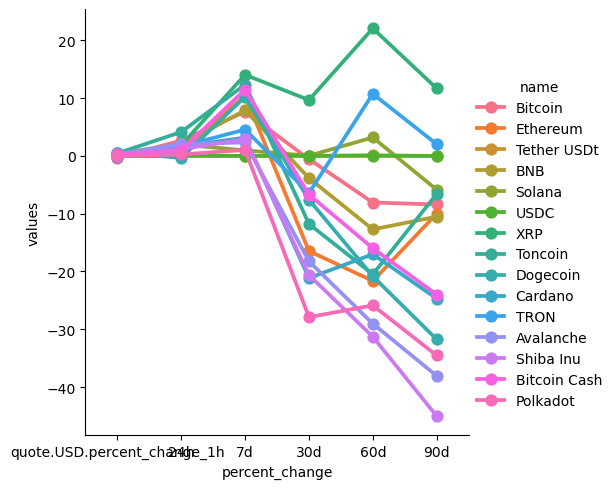

In [20]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [21]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

name  quote.USD.price                        timestamp
0     Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
15    Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
30    Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
45    Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
60    Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
75    Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
90    Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
105   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
120   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
135   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
150   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
165   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
180   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
195   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
210   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
225   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
240   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
255   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
270   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
285   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
300   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
315   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
330   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
345   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
360   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
375   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
390   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
405   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
420   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
435   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
450   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
465   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
480   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
495   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
510   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
525   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
540   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
555   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
570   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
585   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
600   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
615   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
630   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
645   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
660   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
675   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
690   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
705   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
720   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
735   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
750   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
765   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
780   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
795   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
810   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
825   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
840   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
855   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
870   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
885   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
900   Bitcoin      60625.70832 2024-08-14 00:13:35.147620+00:00
915   Bitcoin      60625.70832 2024-08-14

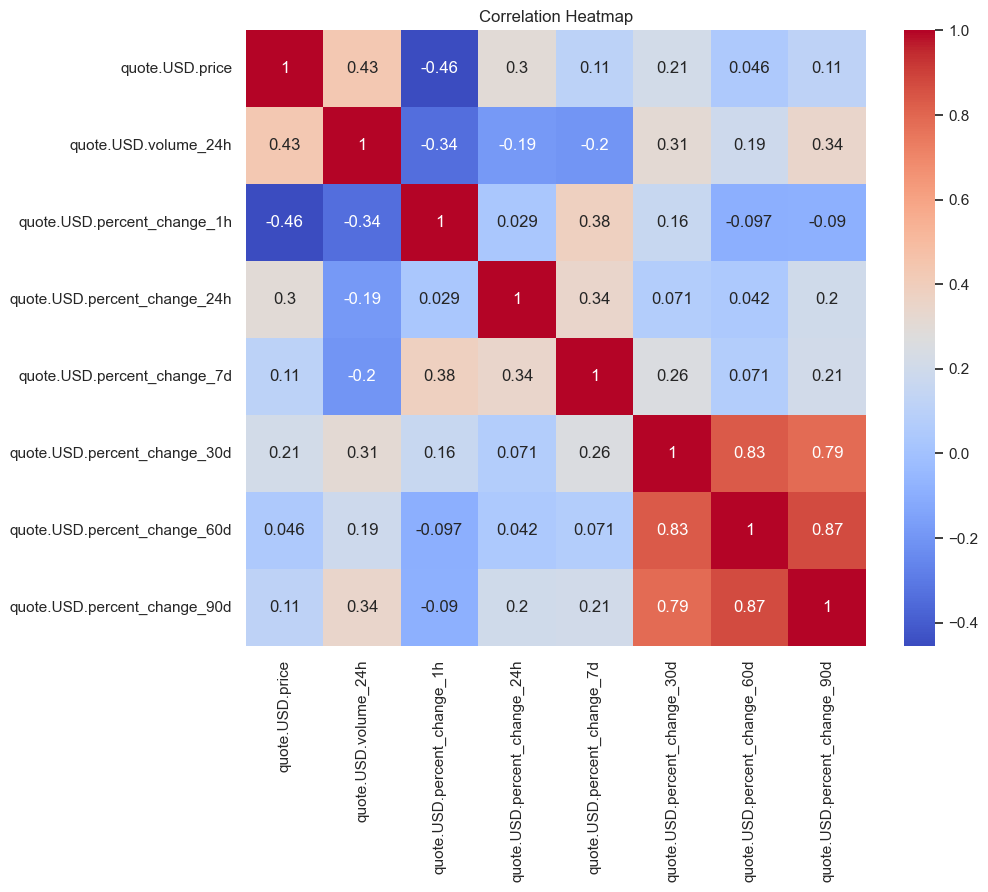

In [38]:
# Correlation Heatmap for all cryptocurrencies
plt.figure(figsize=(10, 8))
correlation_matrix = df[['quote.USD.price', 'quote.USD.volume_24h', 
                         'quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 
                         'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 
                         'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

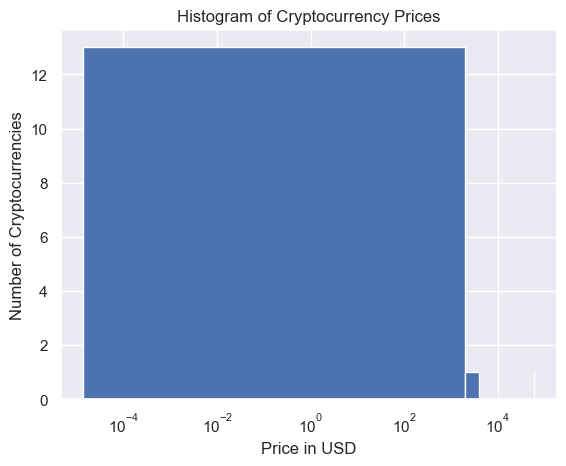

In [48]:
# 1. Distribution of Prices for All Cryptocurrencies
import matplotlib.pyplot as plt

# Filter the dataframe to include only the relevant columns
df_price_distribution = df[['name', 'quote.USD.price', 'timestamp']]

# Get the latest timestamp for each cryptocurrency to avoid duplicate entries
df_price_distribution_latest = df_price_distribution.loc[df_price_distribution.groupby('name')['timestamp'].idxmax()]


# Plot the histogram of cryptocurrency prices
plt.hist(df_price_distribution_latest['quote.USD.price'], bins=30)
plt.title('Histogram of Cryptocurrency Prices')
plt.xlabel('Price in USD')
plt.ylabel('Number of Cryptocurrencies')
plt.xscale('log')  # Scale x-axis to log for better visualization of large differences
plt.grid(True)
plt.show()



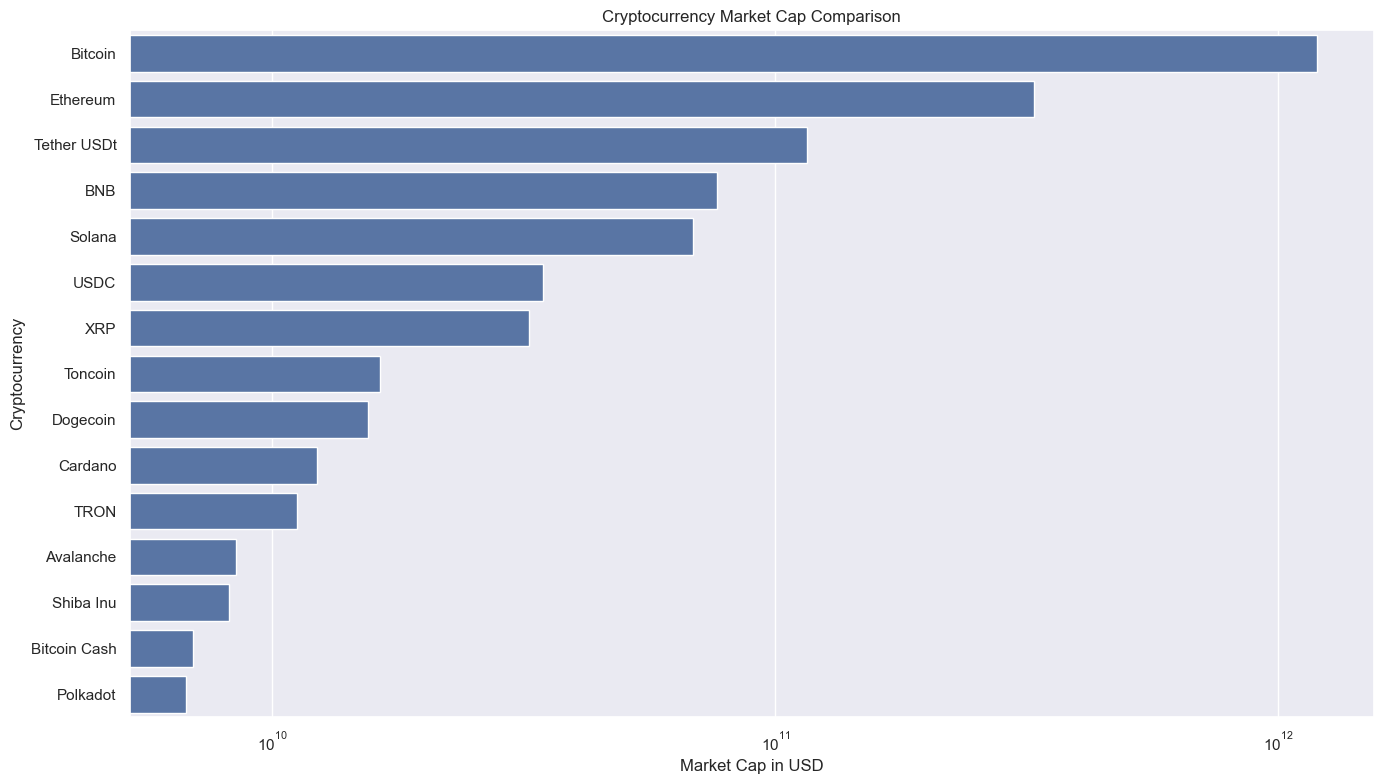

In [43]:
# Filter the dataframe to include only the relevant columns
df_market_cap = df[['name', 'quote.USD.market_cap', 'timestamp']]

# Get the latest timestamp for each cryptocurrency to avoid duplicate entries
df_market_cap_latest = df_market_cap.loc[df_market_cap.groupby('name')['timestamp'].idxmax()]

# Sort the dataframe by market cap in descending order
df_market_cap_latest = df_market_cap_latest.sort_values(by='quote.USD.market_cap', ascending=False)

# Plot the market cap comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='quote.USD.market_cap', y='name', data=df_market_cap_latest)
plt.title('Cryptocurrency Market Cap Comparison')
plt.xlabel('Market Cap in USD')
plt.ylabel('Cryptocurrency')
plt.xscale('log')  # Scale x-axis to log for better visualization of large differences
plt.tight_layout()
plt.show()


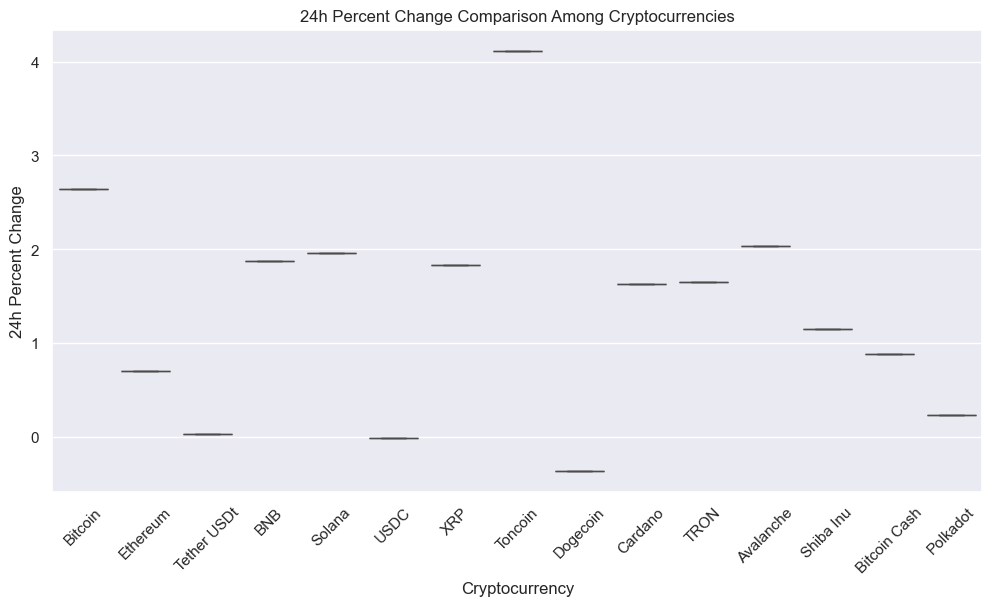

In [42]:
#4. Box Plot for Volatility Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='name', y='quote.USD.percent_change_24h', data=df)
plt.title('24h Percent Change Comparison Among Cryptocurrencies')
plt.xticks(rotation=45)
plt.xlabel('Cryptocurrency')
plt.ylabel('24h Percent Change')
plt.show()


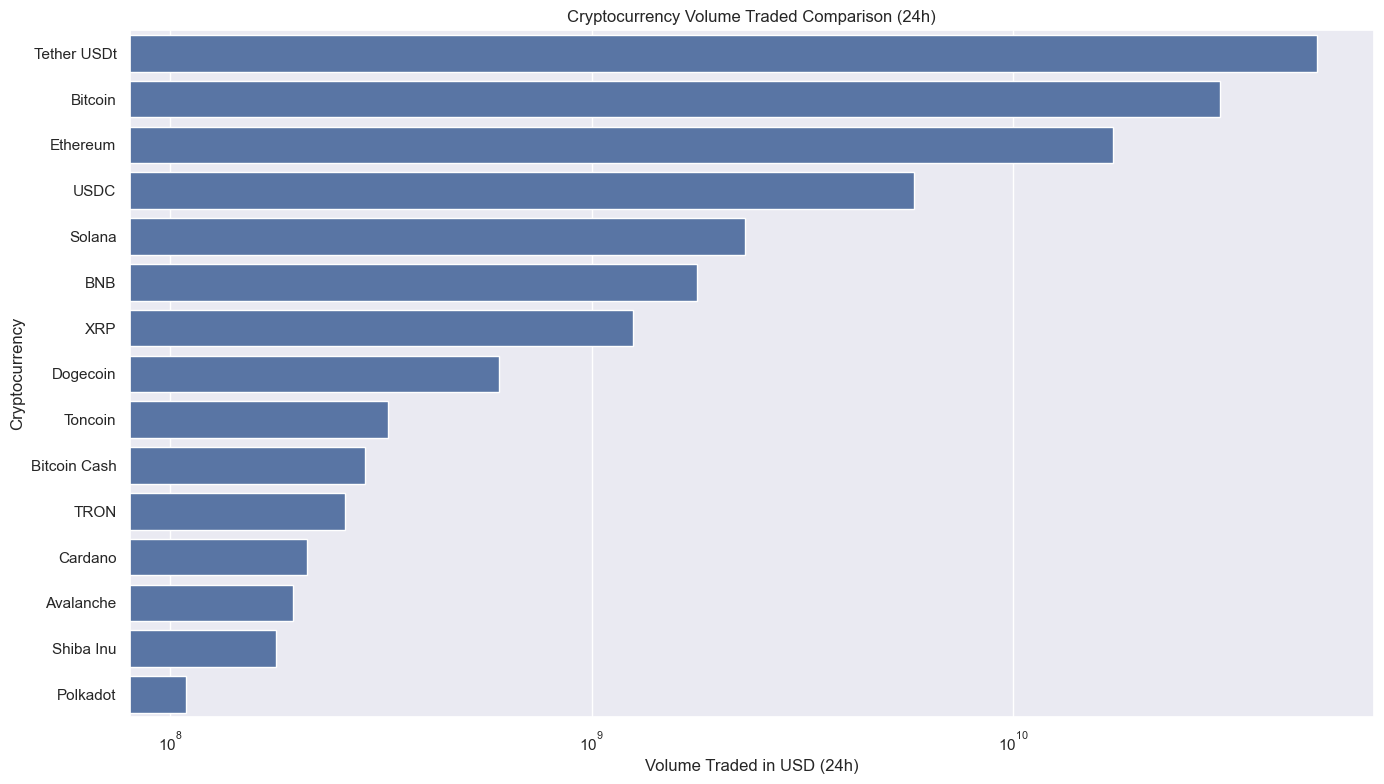

In [44]:
# Filter the dataframe to include only the relevant columns
df_volume = df[['name', 'quote.USD.volume_24h', 'timestamp']]

# Get the latest timestamp for each cryptocurrency to avoid duplicate entries
df_volume_latest = df_volume.loc[df_volume.groupby('name')['timestamp'].idxmax()]

# Sort the dataframe by volume in descending order
df_volume_latest = df_volume_latest.sort_values(by='quote.USD.volume_24h', ascending=False)

# Plot the volume traded comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='quote.USD.volume_24h', y='name', data=df_volume_latest)
plt.title('Cryptocurrency Volume Traded Comparison (24h)')
plt.xlabel('Volume Traded in USD (24h)')
plt.ylabel('Cryptocurrency')
plt.xscale('log')  # Scale x-axis to log for better visualization of large differences
plt.tight_layout()
plt.show()


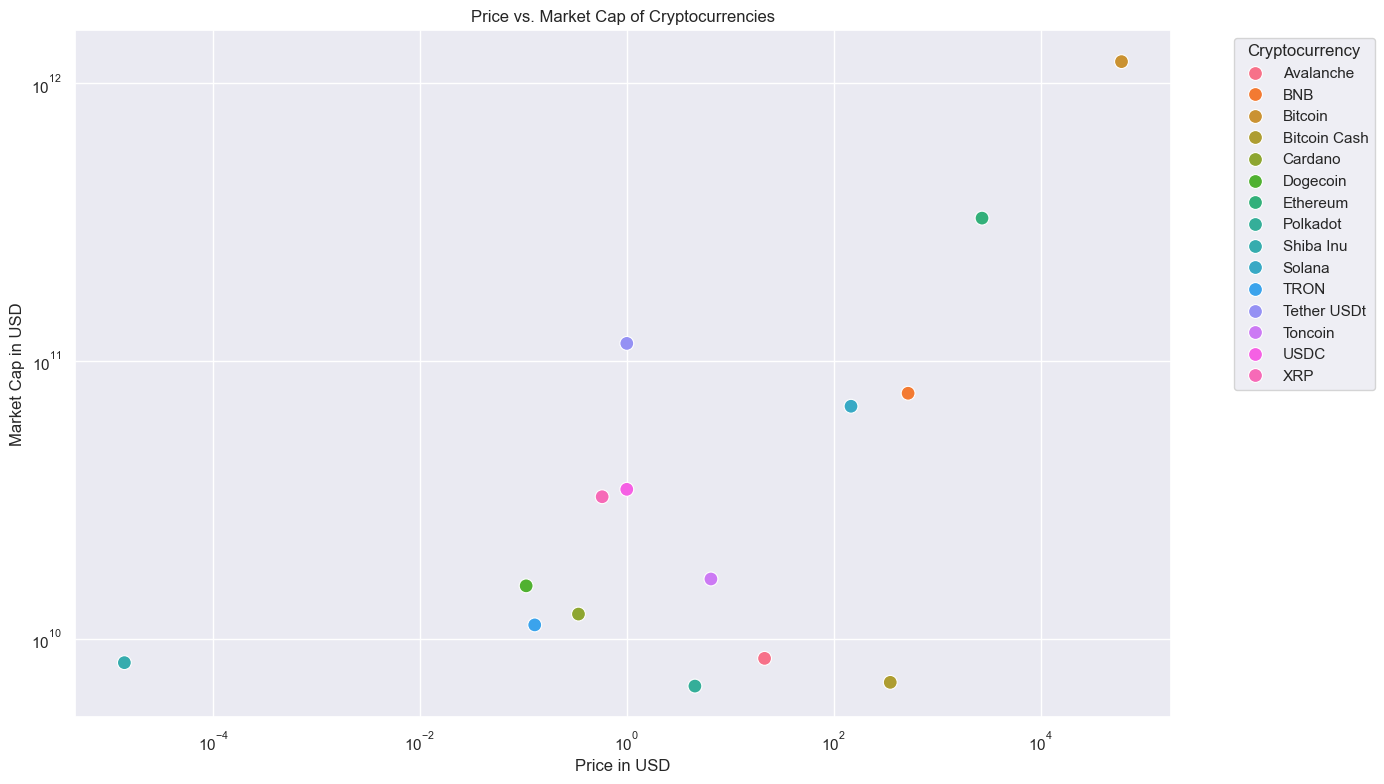

In [45]:
import matplotlib.pyplot as plt

# Filter the dataframe to include only the relevant columns
df_price_market_cap = df[['name', 'quote.USD.price', 'quote.USD.market_cap', 'timestamp']]

# Get the latest timestamp for each cryptocurrency to avoid duplicate entries
df_price_market_cap_latest = df_price_market_cap.loc[df_price_market_cap.groupby('name')['timestamp'].idxmax()]

# Plot the Price vs. Market Cap scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(x='quote.USD.price', y='quote.USD.market_cap', hue='name', data=df_price_market_cap_latest, s=100)
plt.title('Price vs. Market Cap of Cryptocurrencies')
plt.xlabel('Price in USD')
plt.ylabel('Market Cap in USD')
plt.xscale('log')  # Scale x-axis to log for better visualization of large differences
plt.yscale('log')  # Scale y-axis to log for better visualization of large differences
plt.legend(title='Cryptocurrency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
